<a href="https://colab.research.google.com/github/kavyabanka/Spaceship_Problem/blob/main/spaceship_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv("/content/train (1).csv")
test = pd.read_csv("/content/test (1).csv")

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#Understanding the data

In [ ]:
train.shape

(8693, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train = train.drop(columns = ['Name'])

#EDA

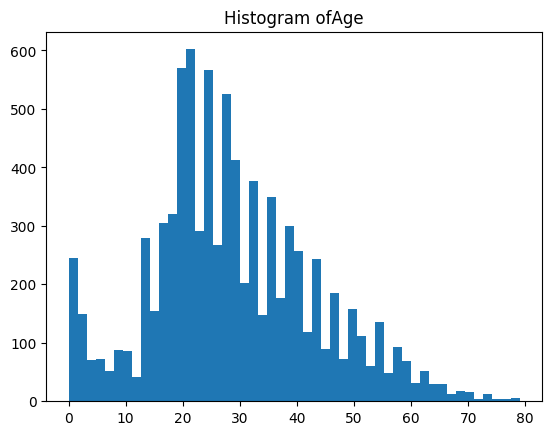

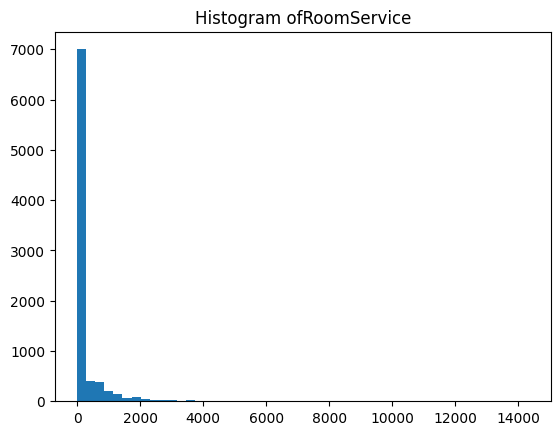

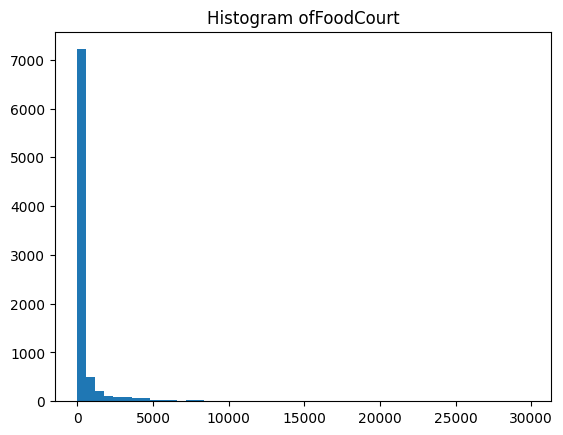

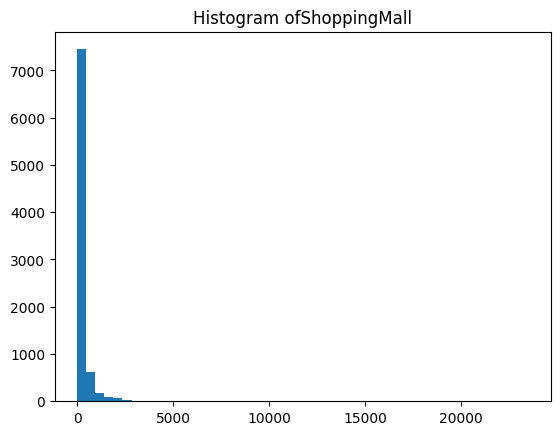

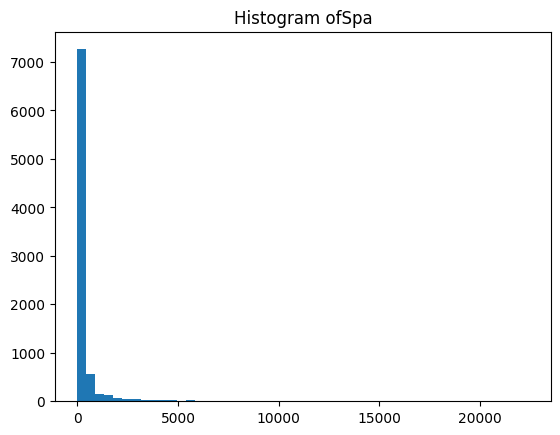

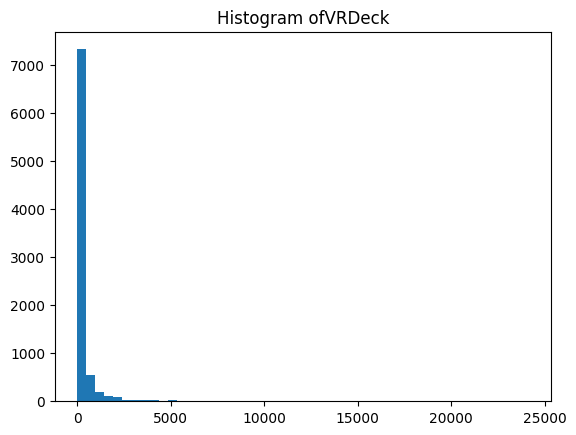

In [ ]:
for col in train.select_dtypes(include = 'float64').columns:
  plt.hist(train[col], bins= 50)
  plt.title(f"Histogram of{col}")
  plt.show()

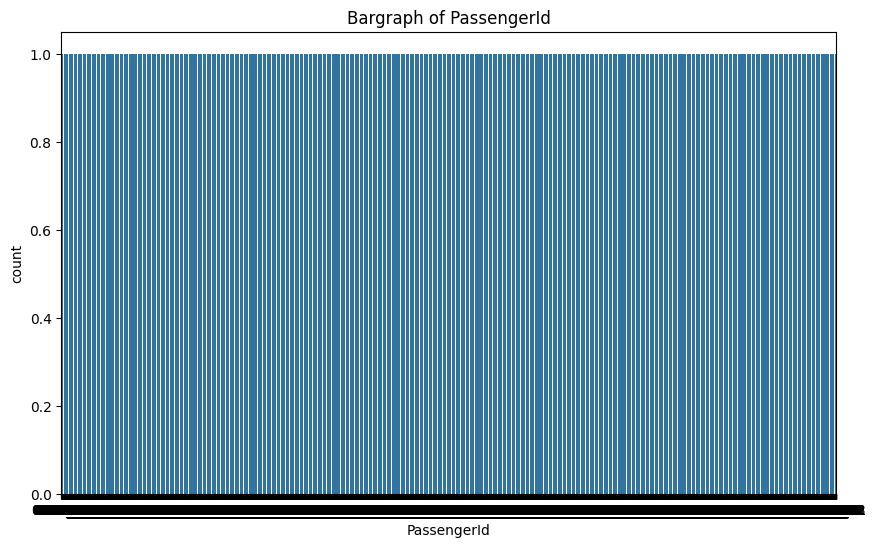

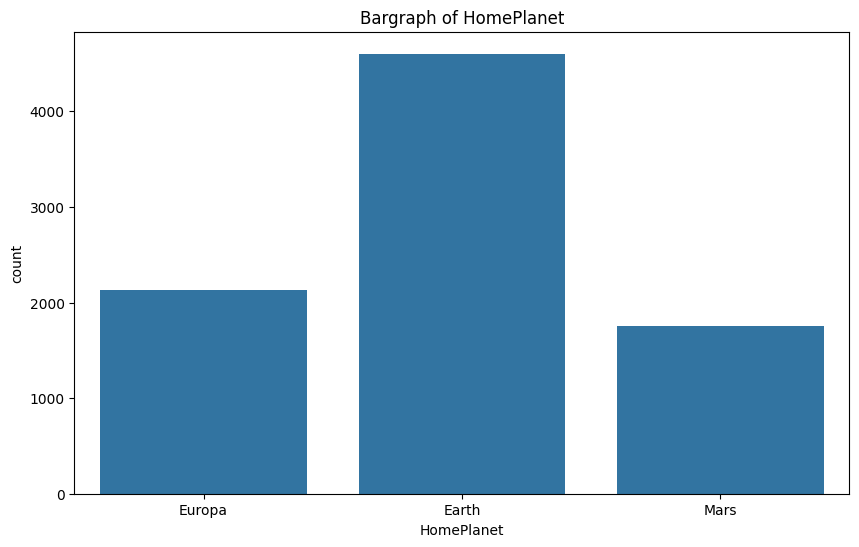

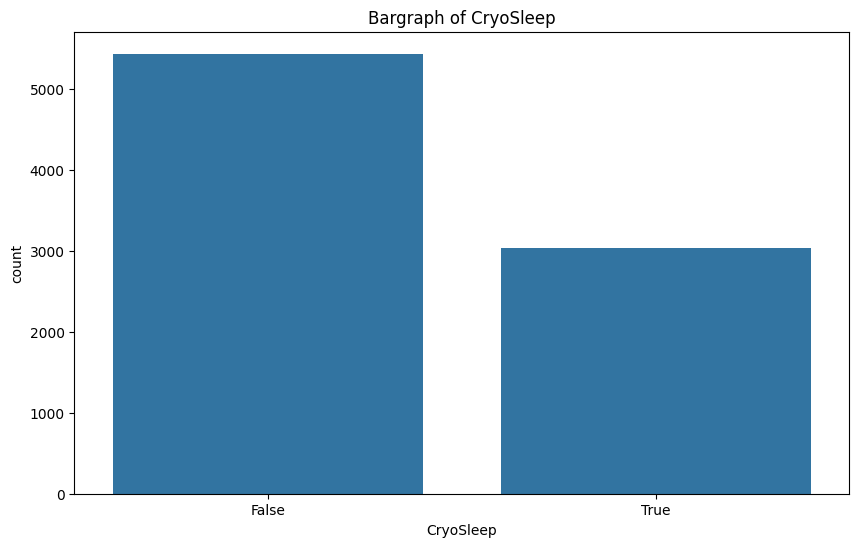

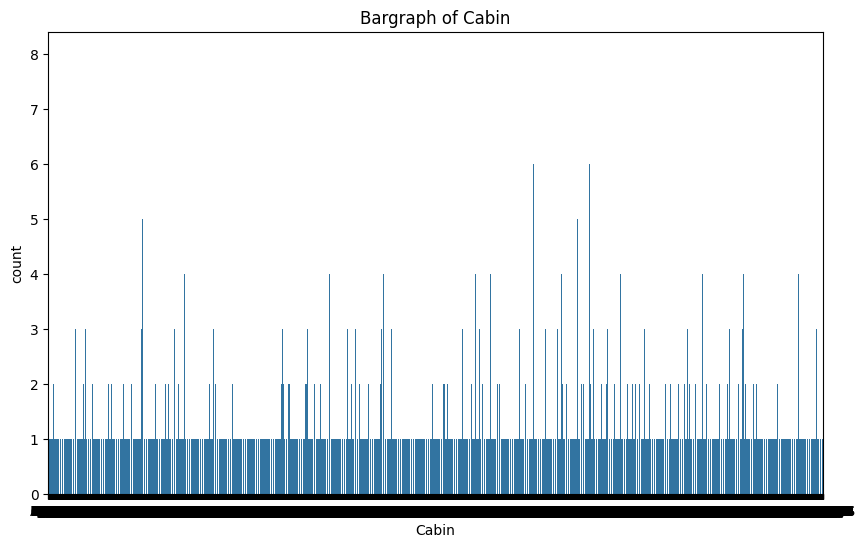

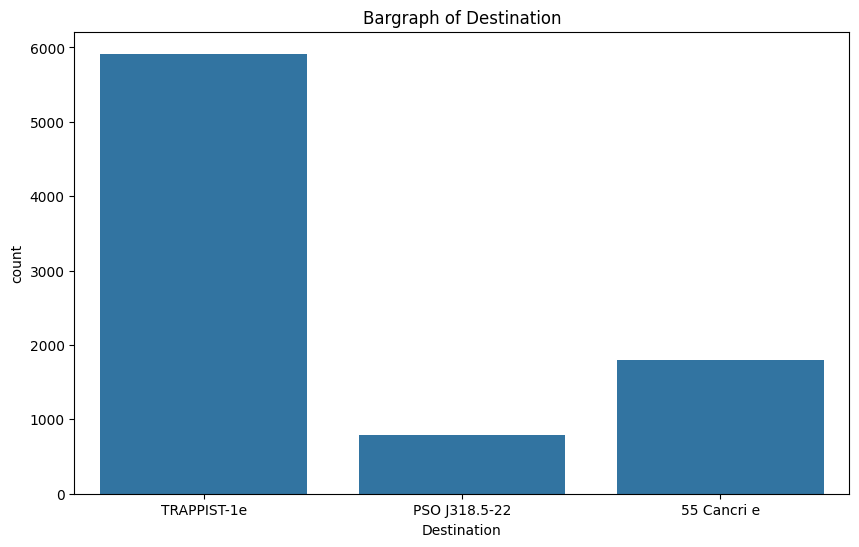

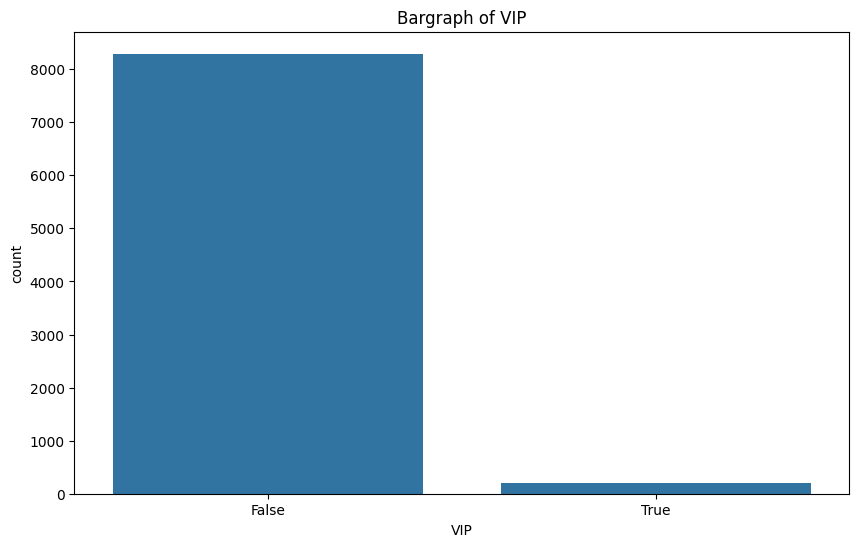

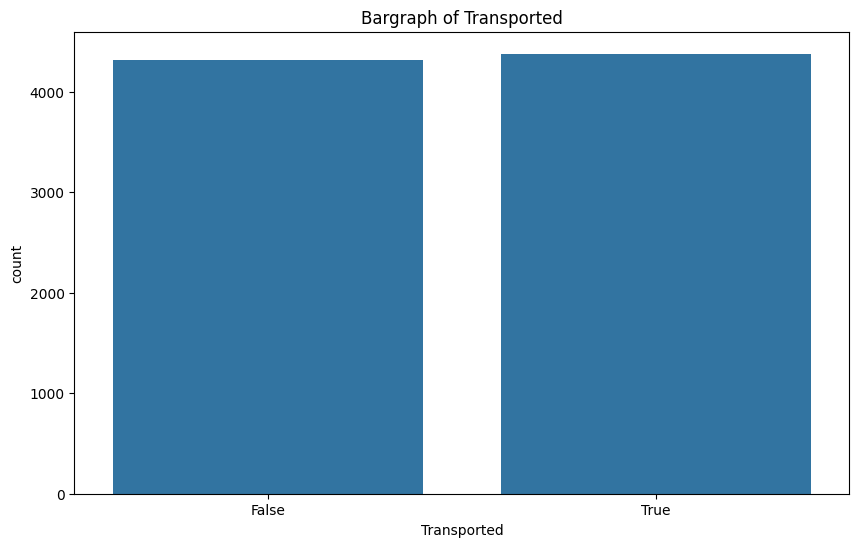

In [ ]:
for col in train.select_dtypes(include = ['object', 'bool']).columns:
  plt.figure(figsize = (10, 6))
  sns.countplot(x = col, data = train)
  plt.title(f"Bargraph of {col}")
  plt.show()

In [ ]:
for col in train.select_dtypes(include = ['float64']).columns:
  print(f"Mean of {col} is {train[col].mean()}")
  print(f"Median of {col} is {train[col].median()}")
  print(f"Mode of {col} is {train[col].mode()}")
  print()

Mean of Age is 28.82793046746535
Median of Age is 27.0
Mode of Age is 0    24.0
Name: Age, dtype: float64

Mean of RoomService is 224.687617481203
Median of RoomService is 0.0
Mode of RoomService is 0    0.0
Name: RoomService, dtype: float64

Mean of FoodCourt is 458.07720329024676
Median of FoodCourt is 0.0
Mode of FoodCourt is 0    0.0
Name: FoodCourt, dtype: float64

Mean of ShoppingMall is 173.72916912197996
Median of ShoppingMall is 0.0
Mode of ShoppingMall is 0    0.0
Name: ShoppingMall, dtype: float64

Mean of Spa is 311.1387779083431
Median of Spa is 0.0
Mode of Spa is 0    0.0
Name: Spa, dtype: float64

Mean of VRDeck is 304.8547912992357
Median of VRDeck is 0.0
Mode of VRDeck is 0    0.0
Name: VRDeck, dtype: float64



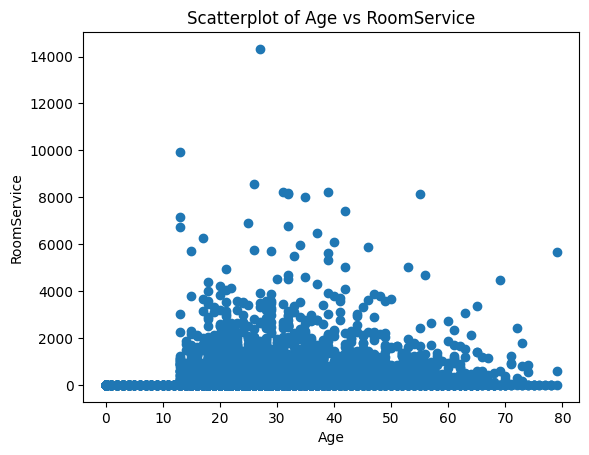

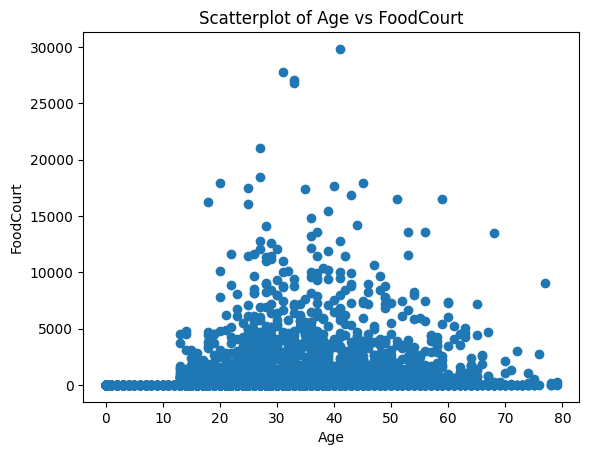

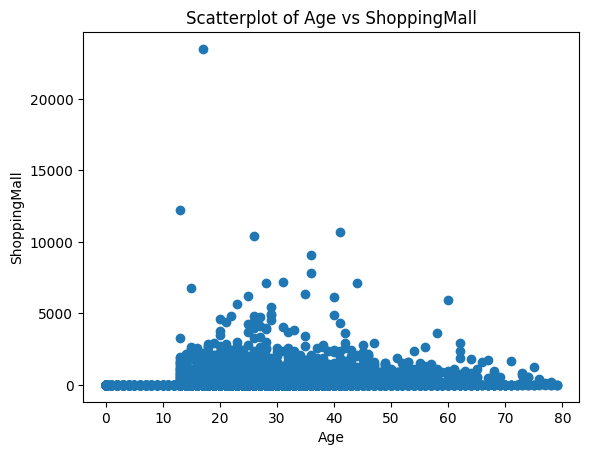

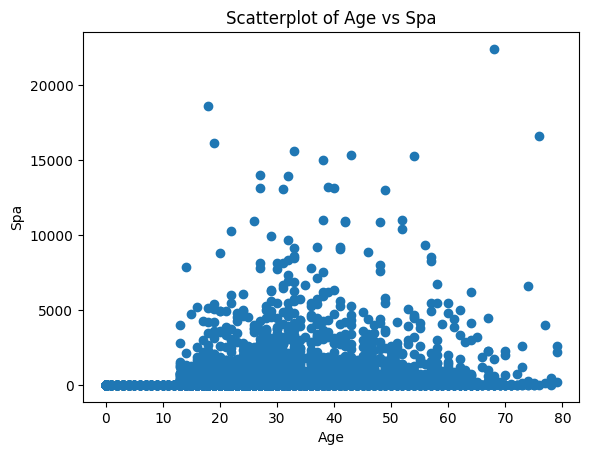

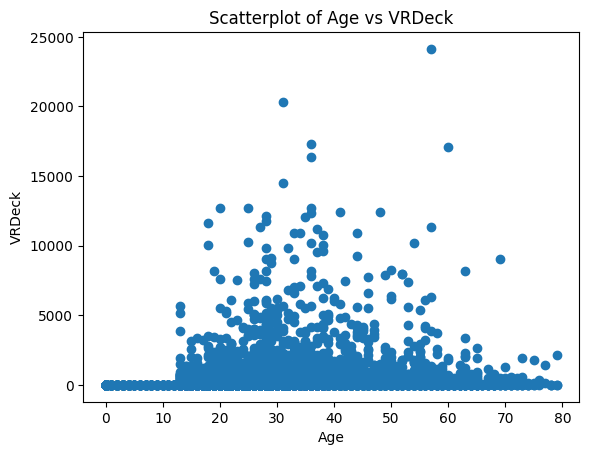

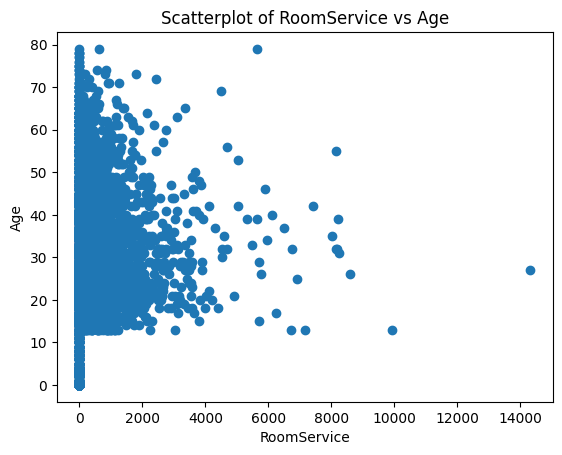

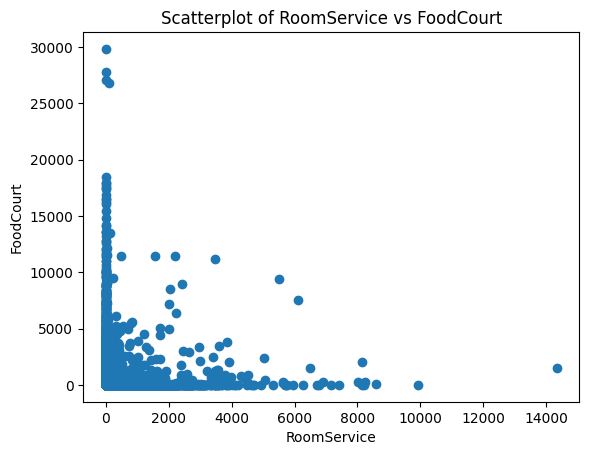

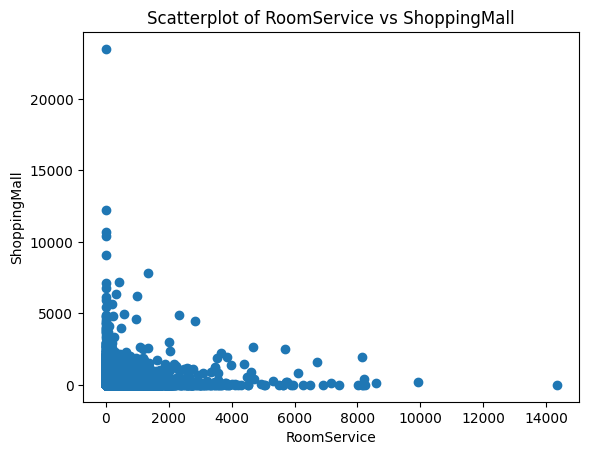

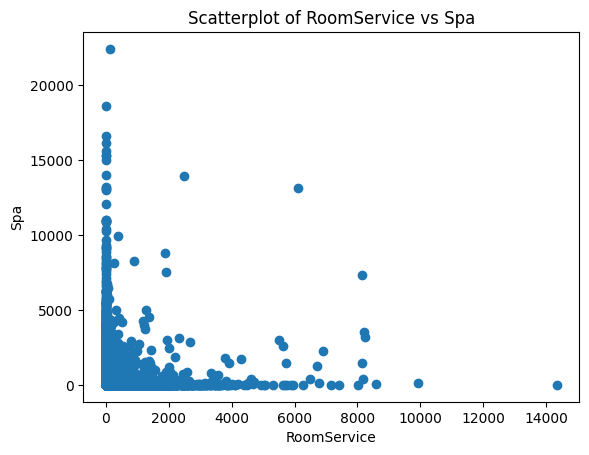

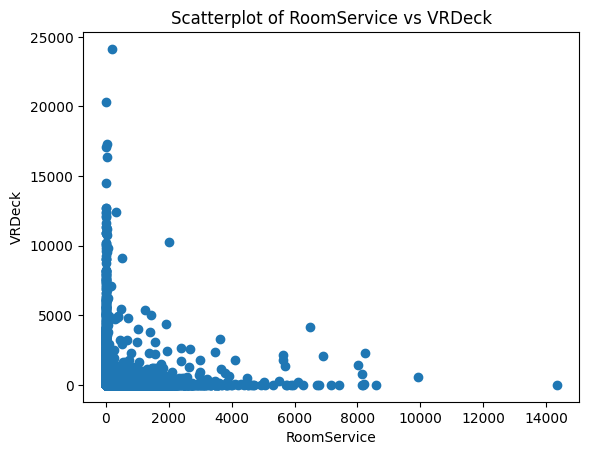

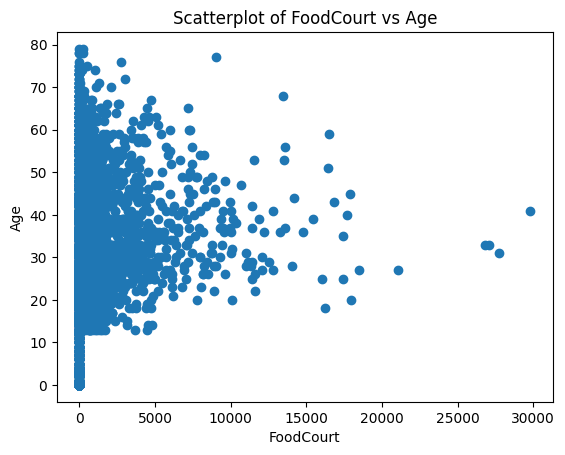

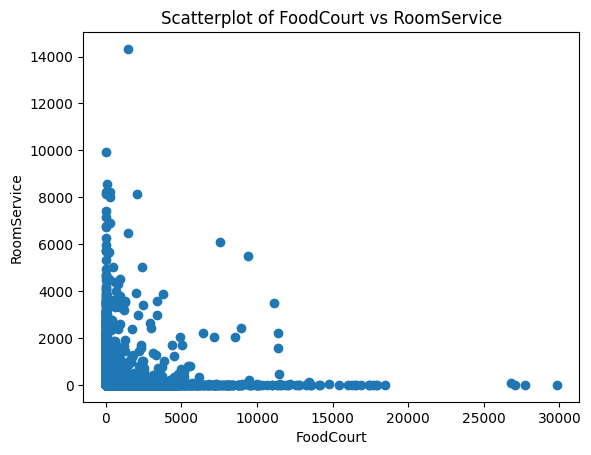

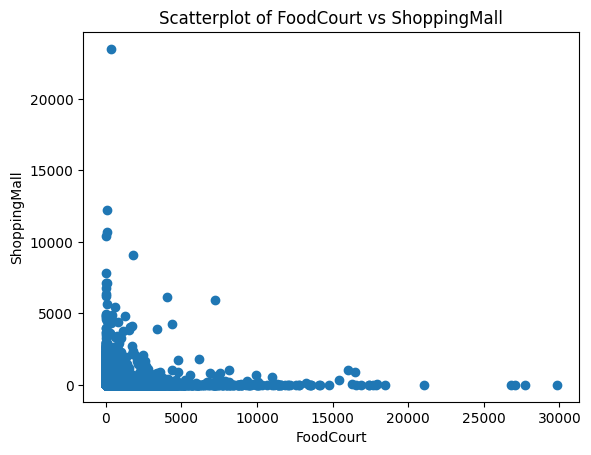

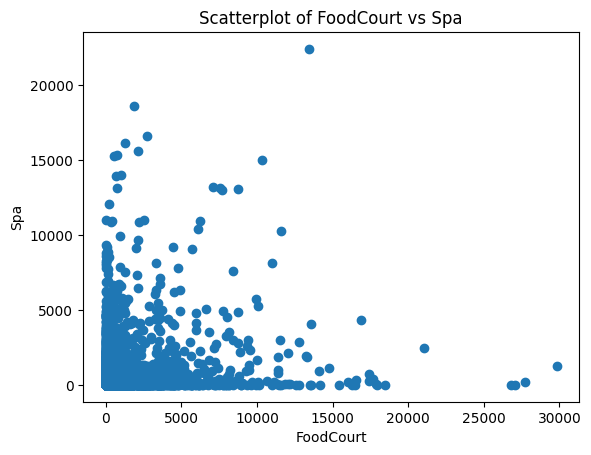

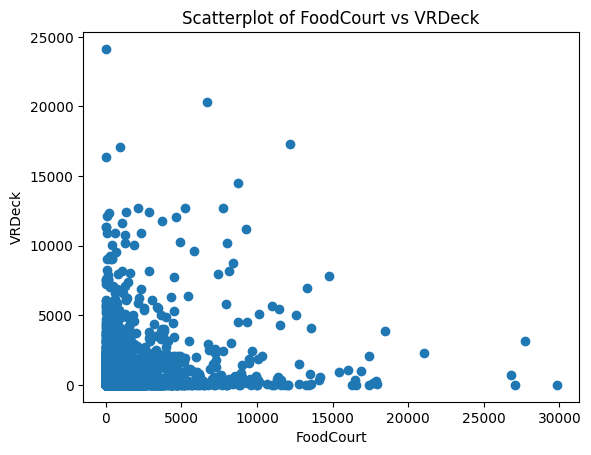

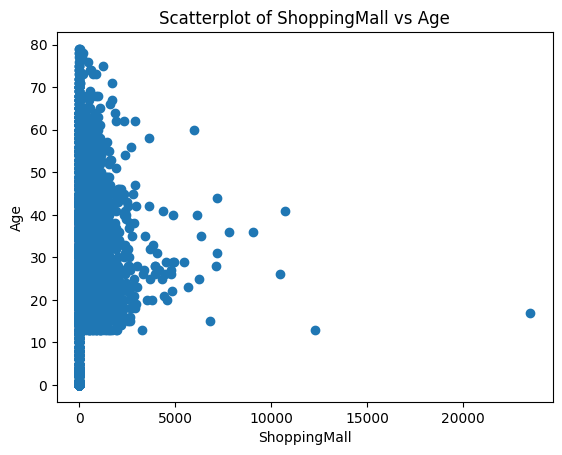

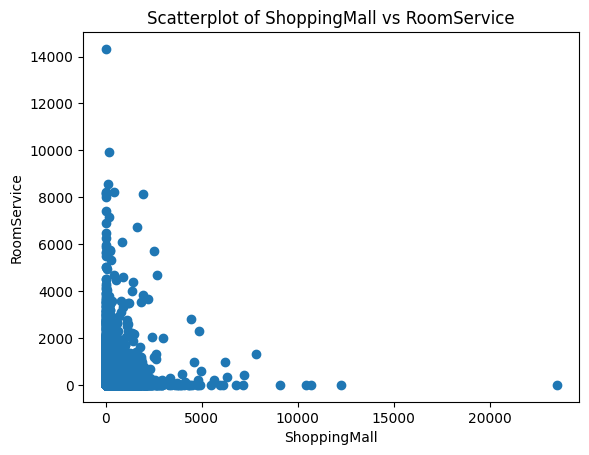

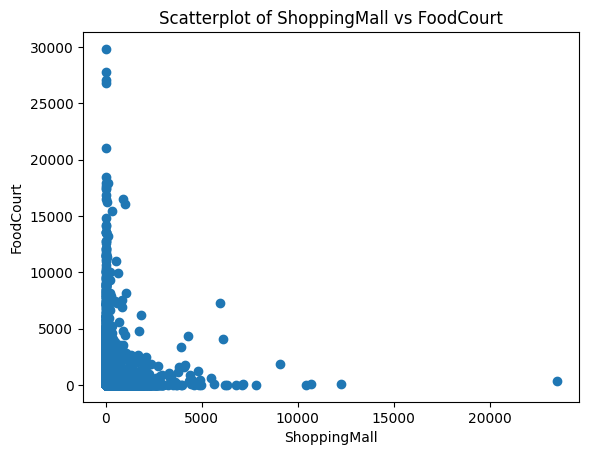

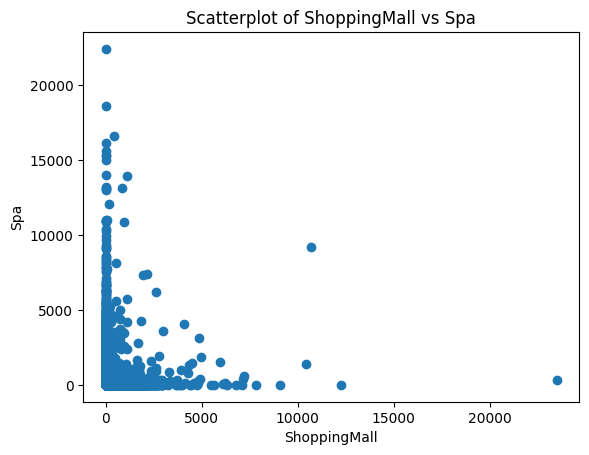

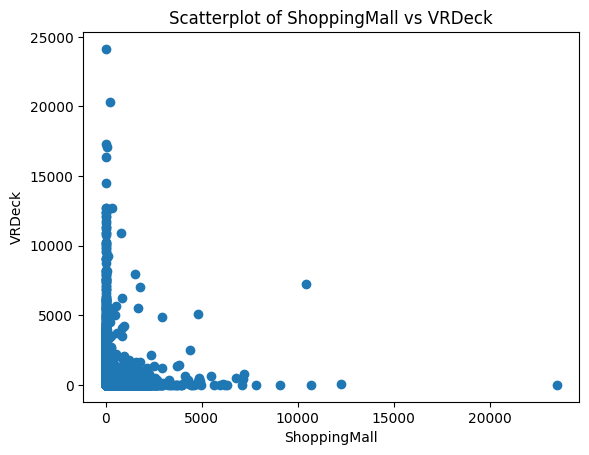

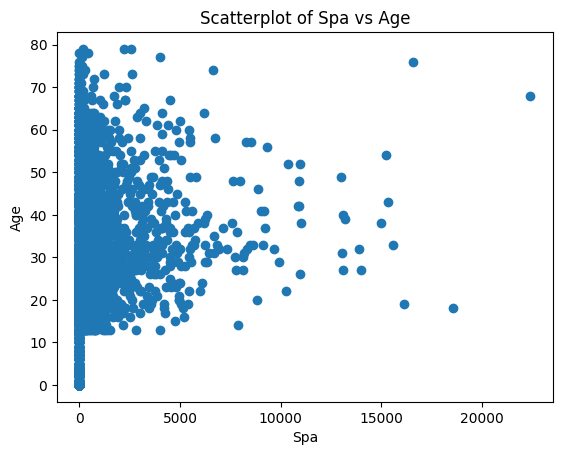

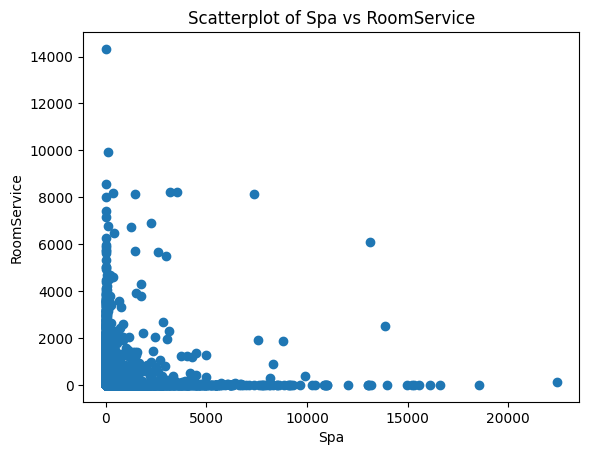

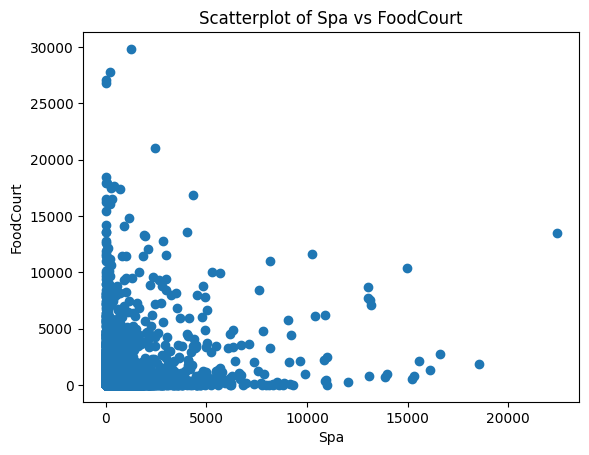

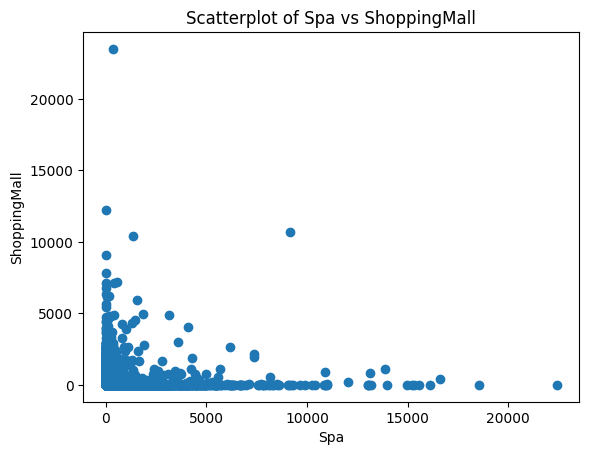

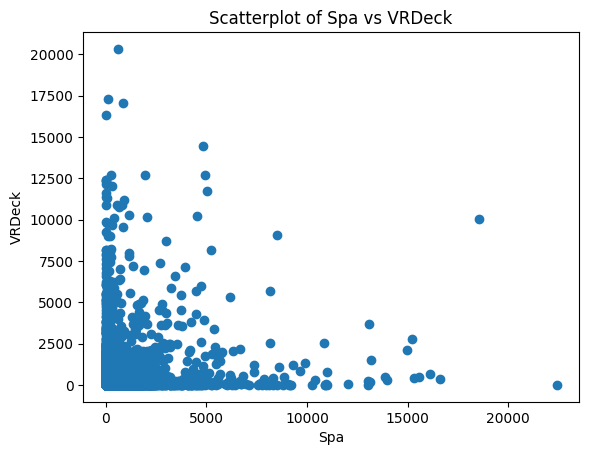

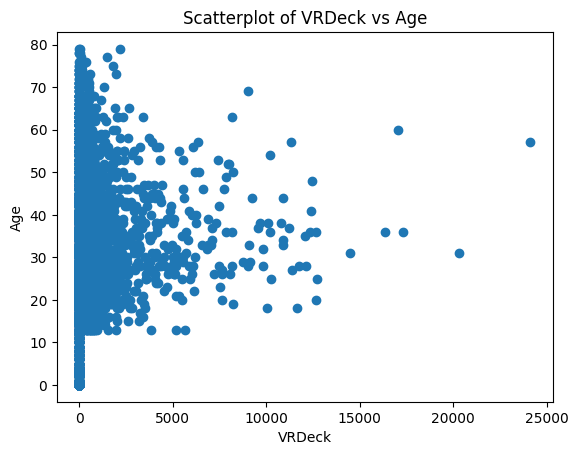

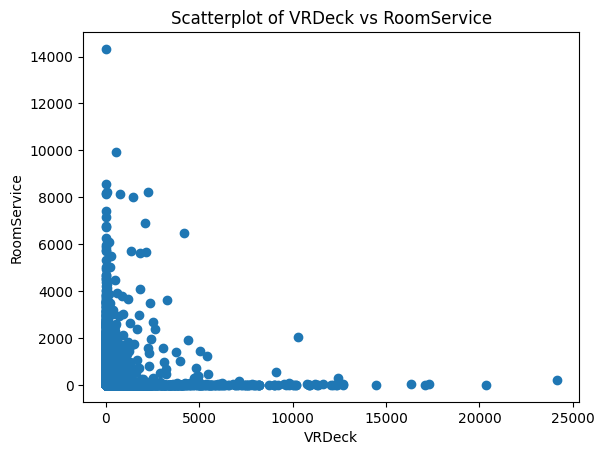

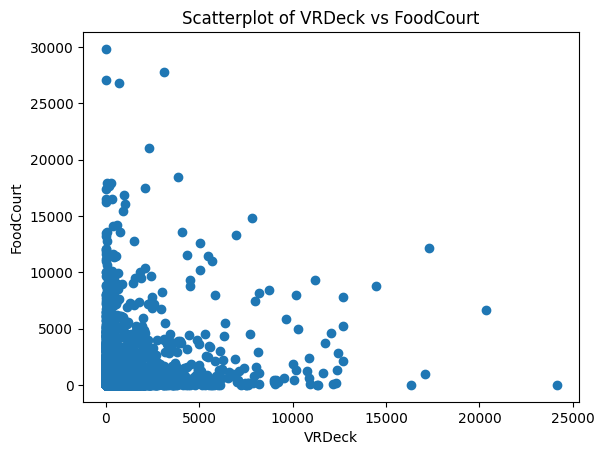

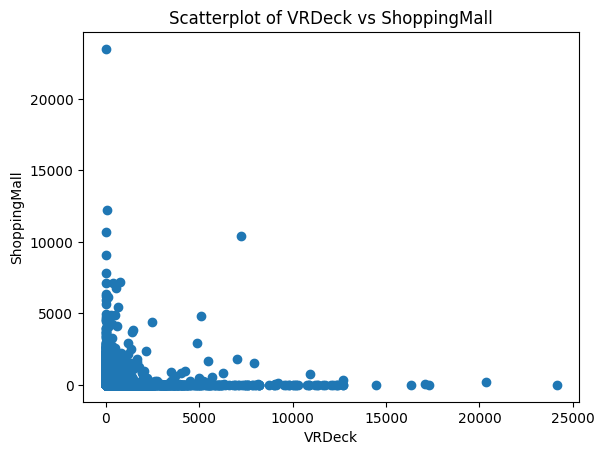

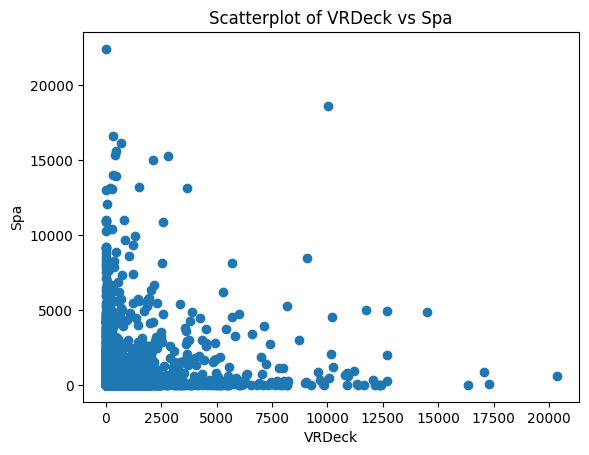

In [ ]:
for col1 in train.select_dtypes(include = ['float64']).columns:
  for col2 in train.select_dtypes(include = ['float64']).columns:
    if col1 != col2:
      plt.scatter(train[col1], train[col2])
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title(f"Scatterplot of {col1} vs {col2}")
      plt.show()

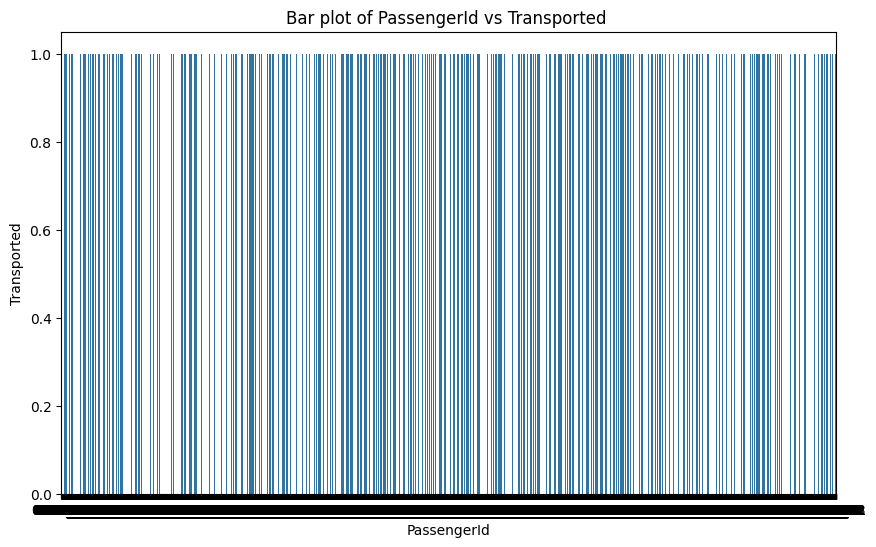

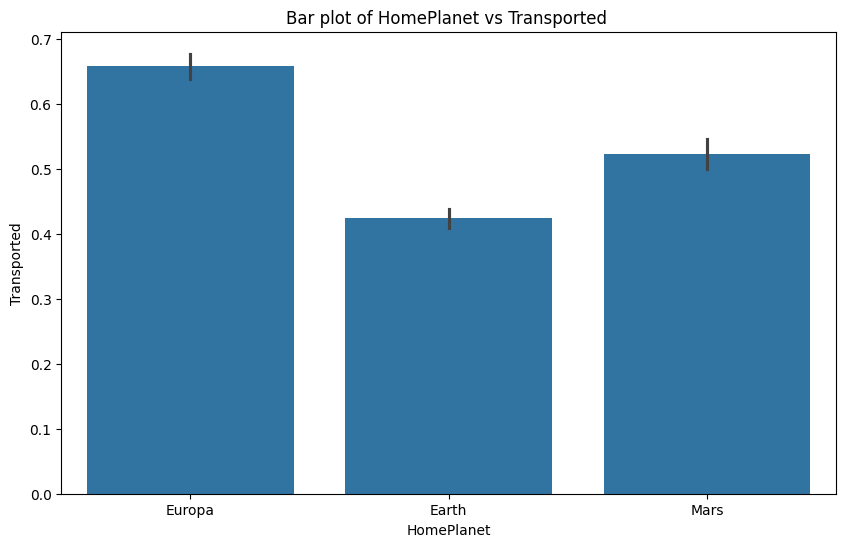

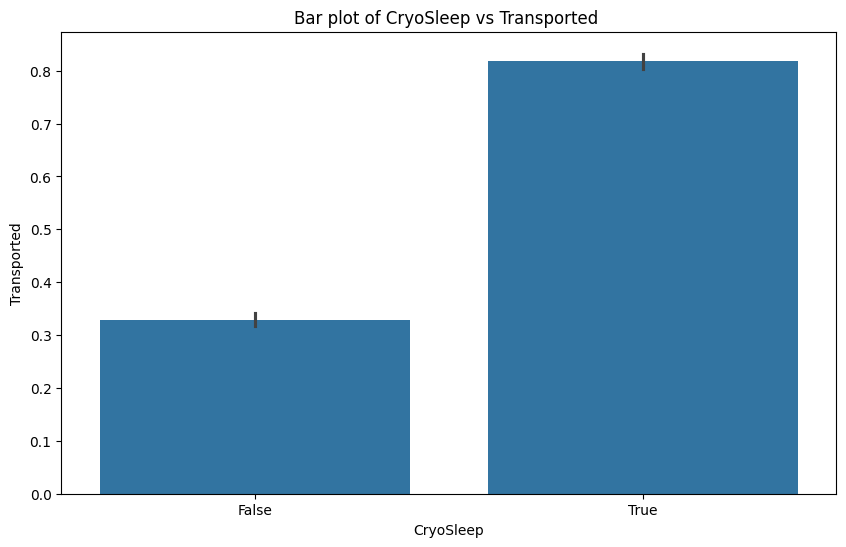

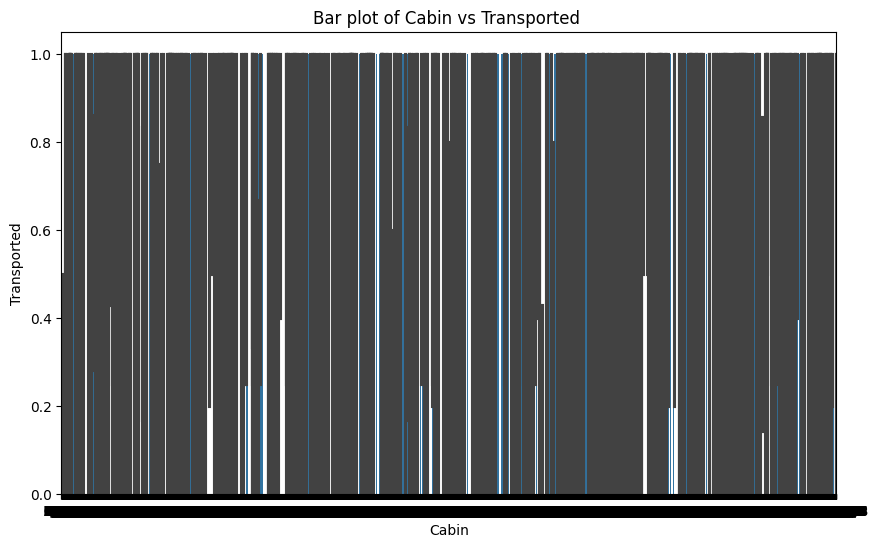

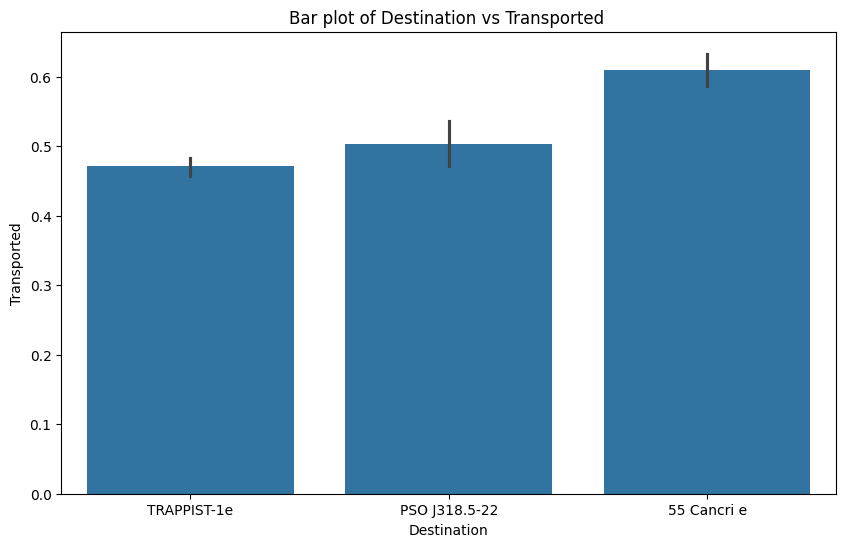

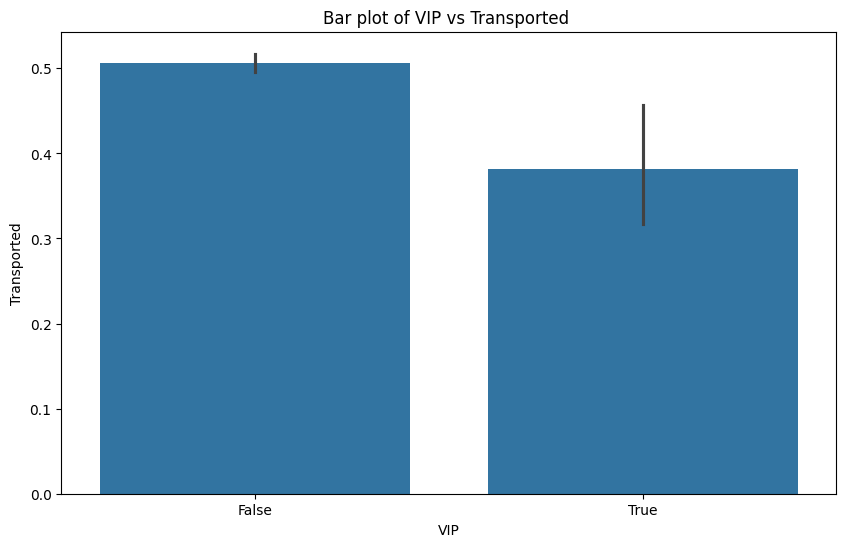

In [ ]:
for col in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Transported', data = train)
    plt.title(f"Bar plot of {col} vs Transported ")
    plt.show()

Handling Missing Values

In [ ]:
for i in train.select_dtypes('float64'):
  train[i].fillna(train[i].median(), inplace = True)

In [ ]:
for i in train.select_dtypes('object'):
  train[i].fillna(train[i].mode()[0], inplace = True)

Encoding categorical variables

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for i in train.select_dtypes('object'):
  if ~(train[i] == train['Cabin']).all():
    train[i] = label_encoder.fit_transform(train[i])

In [ ]:
set(train['HomePlanet'])

{0, 1, 2}

In [ ]:
train['Deck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else 'Unknown')
train['Side'] = train['Cabin'].apply(lambda x: x.split('/')[2] if pd.notna(x) else 'Unknown')

In [ ]:
train['Deck'] = label_encoder.fit_transform(train['Deck'])
train['Side'] = label_encoder.fit_transform(train['Side'])

In [ ]:
set(train['Deck'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
train.drop(columns = ['Cabin'], inplace = True)

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1


##HeatMap

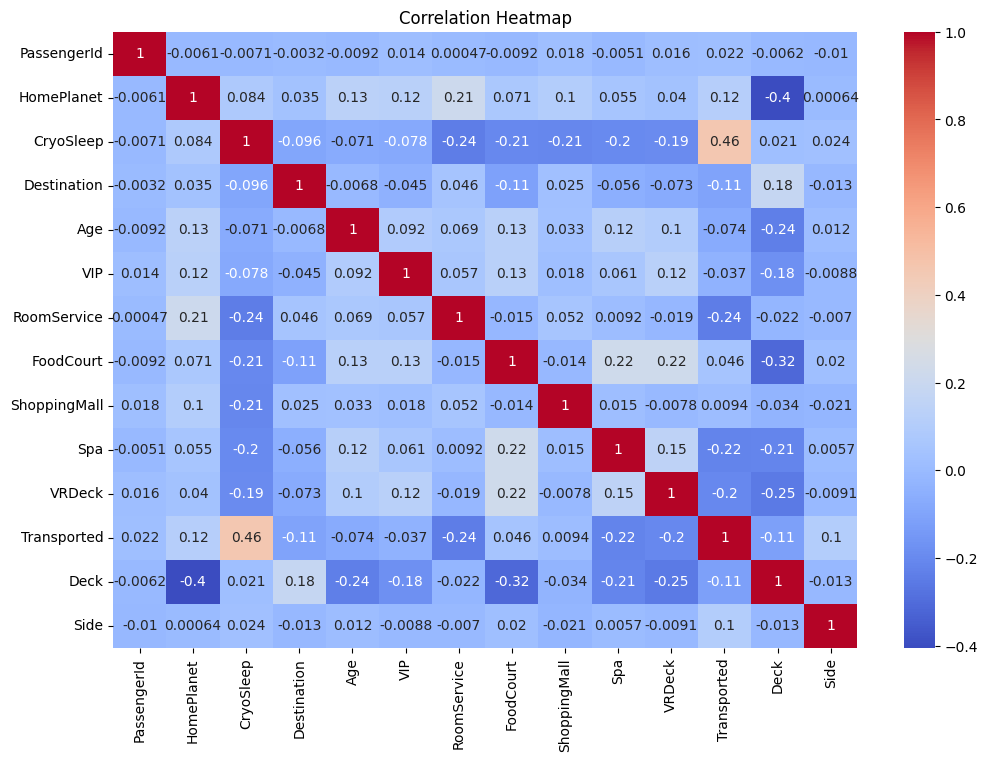

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##MOdel Building

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Transported', 'PassengerId'])
y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (6954, 12)
Validation set size: (1739, 12)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.73      0.76       861
        True       0.75      0.82      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix:
[[627 234]
 [162 716]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.79
Gradient Boosting Accuracy: 0.78
XGBoost Accuracy: 0.78


## Test Data

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
for i in test.select_dtypes('object'):
  test[i].fillna(test[i].mode()[0], inplace = True)

In [ ]:
for i in test.select_dtypes('float64'):
  test[i].fillna(test[i].median(), inplace = True)

In [ ]:
passenger_ids = test['PassengerId'].tolist()

In [ ]:
test = test.drop(columns = ['Name'])

In [ ]:
test = test.drop(columns = ['PassengerId'])

In [ ]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in test.select_dtypes(include = ['object']).columns:
  if col != 'Cabin':
    test[col] = label_encoder.fit_transform(test[col].astype(str))

In [ ]:
test['Cabin']

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273     G/160/P
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object

In [ ]:
test['Deck'] = test['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else 'Unknown')
test['Side'] = test['Cabin'].apply(lambda x: x.split('/')[2] if pd.notna(x) else 'Unknown')

In [ ]:
test['Deck'] = label_encoder.fit_transform(test['Deck'])
test['Side'] = label_encoder.fit_transform(test['Side'])

In [ ]:
test = test.drop(columns = ['Cabin'])

In [ ]:
test.dropna()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,6,1
1,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,1
2,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,1
3,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1
4,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,34.0,False,0.0,0.0,0.0,0.0,0.0,6,1
4273,0,False,2,42.0,False,0.0,847.0,17.0,10.0,144.0,6,0
4274,2,True,0,26.0,False,0.0,0.0,0.0,0.0,0.0,3,0
4275,1,False,2,26.0,False,0.0,2680.0,0.0,0.0,523.0,3,0


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
res = rf_model.predict(test)

In [ ]:
res

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
results_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': res
})

In [ ]:
test.shape

(4277, 12)

In [ ]:
results_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
